In [64]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore,boxcox

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Impute
from sklearn.impute import SimpleImputer

#Decomposition
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

#CrossVal
from sklearn.model_selection import cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

#Deeplearning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
df_c=pd.read_csv('worldometer_snapshots_April18_to_May18.csv')

In [66]:
df_c.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [67]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [68]:
df_c.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [69]:
df_c['Country'].unique()

array(['USA', 'Russia', 'Spain', 'Brazil', 'UK', 'Italy', 'France',
       'Germany', 'Turkey', 'Iran', 'India', 'Peru', 'China', 'Canada',
       'Saudi Arabia', 'Belgium', 'Mexico', 'Chile', 'Netherlands',
       'Pakistan', 'Qatar', 'Ecuador', 'Switzerland', 'Belarus', 'Sweden',
       'Portugal', 'Singapore', 'Ireland', 'UAE', 'Bangladesh', 'Poland',
       'Ukraine', 'Indonesia', 'Romania', 'Israel', 'South Africa',
       'Japan', 'Colombia', 'Austria', 'Kuwait', 'Egypt',
       'Dominican Republic', 'Philippines', 'S. Korea', 'Denmark',
       'Serbia', 'Panama', 'Czechia', 'Argentina', 'Norway', 'Algeria',
       'Bahrain', 'Afghanistan', 'Australia', 'Morocco', 'Malaysia',
       'Kazakhstan', 'Finland', 'Nigeria', 'Moldova', 'Ghana', 'Oman',
       'Armenia', 'Bolivia', 'Luxembourg', 'Iraq', 'Hungary', 'Cameroon',
       'Azerbaijan', 'Thailand', 'Greece', 'Guinea', 'Uzbekistan',
       'Honduras', 'Sudan', 'Senegal', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'I

In [70]:
df_c[(df_c['Country']=='Mali') & (pd.isnull(df_c['Serious or Critical']))]['Serious or Critical'].isna().sum()

31

In [71]:
df_c.loc[(df_c['Country']=='Mali') & (pd.isnull(df_c['Serious or Critical'])),'Serious or Critical']

108    NaN
321    NaN
534    NaN
747    NaN
960    NaN
1173   NaN
1386   NaN
1599   NaN
1812   NaN
2025   NaN
2238   NaN
2451   NaN
2664   NaN
2877   NaN
3090   NaN
3303   NaN
3516   NaN
3729   NaN
3942   NaN
4155   NaN
4368   NaN
4581   NaN
4794   NaN
5007   NaN
5220   NaN
5433   NaN
5646   NaN
5859   NaN
6072   NaN
6285   NaN
6498   NaN
Name: Serious or Critical, dtype: float64

In [72]:
df_c.loc[df_c['Country']=='Honduras','Serious or Critical'].mean()

10.129032258064516

In [77]:
for x in df_c['Country'].unique():
    if df_c[(df_c['Country']==x) & (pd.isnull(df_c['Serious or Critical']))].count()['Country']>0:
        df_c.loc[(df_c['Country']==x) & (pd.isnull(df_c['Serious or Critical'])),'Serious or Critical']=df_c.groupby('Country').mean().loc[x,'Serious or Critical']

In [79]:
for x in df_c['Country'].unique():
    if df_c[(df_c['Country']==x) & (pd.isnull(df_c['Total Tests']))].count()['Country']>0:
        df_c.loc[(df_c['Country']==x) & (pd.isnull(df_c['Total Tests'])),'Total Tests']=df_c.groupby('Country').mean().loc[x,'Total Tests']

In [83]:
df_c.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests             868
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2201
Active Cases             59
dtype: int64

In [84]:
df_c[(df_c['Country']=='Iraq')]['Serious or Critical'].mean()

nan

In [85]:
df_c[(pd.isnull(df_c['Serious or Critical']))]

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
10,2020-04-18,India,1378381772,335123.000000,16365.0,521.0,2463.0,NaN,13381.0
32,2020-04-18,Indonesia,273176544,39422.000000,6248.0,535.0,631.0,NaN,5082.0
65,2020-04-18,Iraq,40108260,53955.000000,1513.0,82.0,953.0,NaN,478.0
74,2020-04-18,Sudan,43719159,NaN,66.0,10.0,6.0,NaN,50.0
79,2020-04-18,Ivory Coast,26294743,13252.157895,801.0,8.0,239.0,NaN,554.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [86]:
df_c=df_c.dropna()

In [87]:
df_c.isna().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [88]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 6591
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 3747 non-null   object 
 1   Country              3747 non-null   object 
 2   Population           3747 non-null   int64  
 3   Total Tests          3747 non-null   float64
 4   Total Cases          3747 non-null   float64
 5   Total Deaths         3747 non-null   float64
 6   Total Recovered      3747 non-null   float64
 7   Serious or Critical  3747 non-null   float64
 8   Active Cases         3747 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 292.7+ KB


In [90]:
df_c.loc[:,'Date']=pd.to_datetime(df_c['Date'])

In [91]:
df_c['Country'].nunique()

131

In [96]:
le=LabelEncoder()

In [102]:
df_c.loc[:,'Country']=le.fit_transform(df_c['Country'])

In [108]:
df_c.loc[:,'Population']=df_c['Population'].apply(int)

In [109]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 6591
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 3747 non-null   datetime64[ns]
 1   Country              3747 non-null   int64         
 2   Population           3747 non-null   int64         
 3   Total Tests          3747 non-null   float64       
 4   Total Cases          3747 non-null   float64       
 5   Total Deaths         3747 non-null   float64       
 6   Total Recovered      3747 non-null   float64       
 7   Serious or Critical  3747 non-null   float64       
 8   Active Cases         3747 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 452.7 KB


In [112]:
df_c.loc[:,'Month']=df_c['Date'].dt.month

In [114]:
df_c.loc[:,'Year']=df_c['Date'].dt.year

In [117]:
df_c['Month'].nunique()

2

In [118]:
df_c['Year'].nunique()

1

In [119]:
df_c=df_c.drop(['Date','Year'],axis=1)

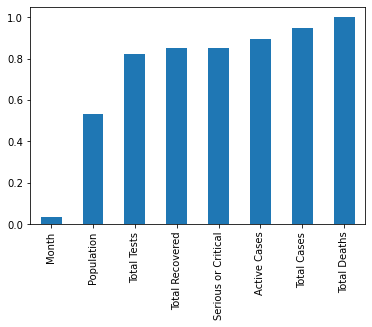

In [123]:
df_c.corr()['Total Deaths'].sort_values().drop('Country').plot(kind='bar')
plt.show()

In [124]:
df.shape

(6603, 9)

In [125]:
zs=zscore(df_c)
df_c=df_c[((zs<3) & (zs>-3)).all(axis=1)]

In [126]:
df.shape

(6603, 9)

In [127]:
pt=PowerTransformer()

In [130]:
for x in df_c.columns:
    if abs(df_c.loc[:,x].skew())>0.55:
        df_c.loc[:,x]=pt.fit_transform(df_c.loc[:,x].values.reshape(-1,1))

In [131]:
df_c.skew()

Country                0.050556
Population            -0.055719
Total Tests           -0.056152
Total Cases           -0.013020
Total Deaths           0.060970
Total Recovered       -0.002631
Serious or Critical    0.119030
Active Cases          -0.024778
Month                 -0.326847
dtype: float64

In [133]:
scale=MinMaxScaler()

In [135]:
X=df_c.drop('Total Deaths',axis=1)
y=df_c['Total Deaths']

In [136]:
X=scale.fit_transform(X)

In [137]:
def model(mod):
    maxscore=0
    maxsstate=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=mod()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxsstate=x
    print("Max score is {} and maxstate is {}".format(maxscore,maxsstate))

In [138]:
model(LinearRegression)

Max score is 0.8404149932513483 and maxstate is 97


In [139]:
model(RandomForestRegressor)

Max score is 0.9956640109881191 and maxstate is 43


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

In [142]:
cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()

0.9850803369694061

In [143]:
param={'n_estimators':[100,130,150,170,190,210,230,250,270,290,310,330,350,370,430]}
gscv=GridSearchCV(RandomForestRegressor(),param)

In [144]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 130, 150, 170, 190, 210, 230,
                                          250, 270, 290, 310, 330, 350, 370,
                                          430]})

In [145]:
gscv.best_params_

{'n_estimators': 230}

In [146]:
rf=RandomForestRegressor(n_estimators=230)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [147]:
print("R2 score is {}".format(r2_score(y_test,predict)))
print()
print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
print()
print("RMSE score is {}".format(np.sqrt(mean_squared_error(y_test,predict))))

R2 score is 0.9956948403380409

MAE score is 0.03324794752077731

RMSE score is 0.066904144039516


In [148]:
joblib.dump(rf,'Covid RF.obj')

['Covid RF.obj']